# Text Summarization

Library Import

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

## Data Loading

Data Loading

In [2]:
dataset_path = "BBC-sample-news.txt"
news_text = []

with open(dataset_path, "r") as f:
    news_text = f.read()

news_text[:5]

'Hewit'

Tokenize sentences using nltk.word_tokenize

In [3]:
words = nltk.word_tokenize(news_text)
words[:10]

['Hewitt',
 'decries',
 "'career",
 "sexism'",
 'Plans',
 'to',
 'extend',
 'paid',
 'maternity',
 'leave']

## Data Visualization

Word Cloud

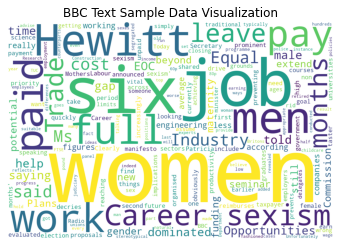

In [4]:
def visualize_word_cloud(text, width, height, title = "Data Visualization"):
    word_cloud = WordCloud(width = width, height = height, background_color = "white")
    word_cloud.generate(text)

    plt.title(title)
    plt.axis("off")
    plt.imshow(word_cloud)

visualize_word_cloud(news_text, width = 1200, height = 800, title = "BBC Text Sample Data Visualization")

## Data Preprocessing

Tokenize Sentences using nltk.sent_tokenize

In [5]:
sentences = nltk.sent_tokenize(news_text)
sentences[:3]

["Hewitt decries 'career sexism'\n\nPlans to extend paid maternity leave beyond six months should be prominent in Labour's election manifesto, the Trade and Industry Secretary has said.",
 'Patricia Hewitt said the cost of the proposals was being evaluated, but it was an "increasingly high priority" and a "shared goal across government".',
 'Ms Hewitt was speaking at a gender and productivity seminar organised by the Equal Opportunities Commission (EOC).']

Lowercase All Text

In [6]:
def lowercase_letters(sentence):
    return sentence.lower()

text_lowercase_df = list(map(lowercase_letters, sentences))
text_lowercase_df[:5]

["hewitt decries 'career sexism'\n\nplans to extend paid maternity leave beyond six months should be prominent in labour's election manifesto, the trade and industry secretary has said.",
 'patricia hewitt said the cost of the proposals was being evaluated, but it was an "increasingly high priority" and a "shared goal across government".',
 'ms hewitt was speaking at a gender and productivity seminar organised by the equal opportunities commission (eoc).',
 "mothers can currently take up to six months' paid leave - and six unpaid.",
 'ms hewitt told the seminar: "clearly, one of the things we need to do in the future is to extend the period of payment for maternity leave beyond the first six months into the second six months.']

Remove Punctuations

In [12]:
def get_removed_duplicated_space_in_string(my_string):
    return " ".join(my_string.split())

def get_erased_punctuations(text):
    list_of_punctuations = string.punctuation + '"‘'
    final_text = text
    
    for punc in list_of_punctuations:
        final_text = final_text.replace(punc, "")
    
    final_text = get_removed_duplicated_space_in_string(final_text)
    
    return final_text

text_no_punc_df = [get_erased_punctuations(text) for text in text_lowercase_df]
text_no_punc_df[:3]

['hewitt decries career sexism plans to extend paid maternity leave beyond six months should be prominent in labours election manifesto the trade and industry secretary has said',
 'patricia hewitt said the cost of the proposals was being evaluated but it was an increasingly high priority and a shared goal across government',
 'ms hewitt was speaking at a gender and productivity seminar organised by the equal opportunities commission eoc']

Remove newline characters.

In [13]:
def get_remove_unused_characters_sentences(sentences, unused_character = "\n"):
    erased_unused_characters_sentences = [new_sentence.replace(unused_character, " ") for new_sentence in sentences]
    return erased_unused_characters_sentences

text_unused_characters_removed = get_remove_unused_characters_sentences(
    text_no_punc_df,
)
text_unused_characters_removed[:5]

['hewitt decries career sexism plans to extend paid maternity leave beyond six months should be prominent in labours election manifesto the trade and industry secretary has said',
 'patricia hewitt said the cost of the proposals was being evaluated but it was an increasingly high priority and a shared goal across government',
 'ms hewitt was speaking at a gender and productivity seminar organised by the equal opportunities commission eoc',
 'mothers can currently take up to six months paid leave and six unpaid',
 'ms hewitt told the seminar clearly one of the things we need to do in the future is to extend the period of payment for maternity leave beyond the first six months into the second six months']

## Data Modelling

TF-IDF Vectorizer

In [14]:
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vector_components = tf_idf_vectorizer.fit_transform(text_unused_characters_removed)
tf_idf_vector_components

<26x257 sparse matrix of type '<class 'numpy.float64'>'
	with 471 stored elements in Compressed Sparse Row format>

In [20]:
vector_components_non_zeroes = (tf_idf_vector_components != 0).sum()
print(f"Total of Non Zero Counts from the words within all sentences: {vector_components_non_zeroes}", sep = "")

Total of Non Zero Counts from the words within all sentences: 471


Get the scoring of each sentence.

In [37]:
def get_score_each_sentence(vector_components):
    score_each_sentence = np.array([])
    print("Vector components:")
    for row_vector_comp in vector_components:
        non_zero_elements_in_row_vc = np.nonzero(row_vector_comp)
        average_score = np.average(row_vector_comp[non_zero_elements_in_row_vc])
        score_each_sentence = np.append(score_each_sentence, average_score)
    return score_each_sentence
    
score_each_sentences = get_score_each_sentence(tf_idf_vector_components)
score_each_sentences

Vector components:


array([0.18826556, 0.21324006, 0.24489681, 0.27765575, 0.17660136,
       0.21128204, 0.19179349, 0.21637523, 0.24355482, 0.23720297,
       0.23471929, 0.22870071, 0.15874018, 0.21688685, 0.22348316,
       0.48855066, 0.23678873, 0.43978854, 0.25487001, 0.25263027,
       0.36351125, 0.22468581, 0.26204664, 0.1914894 , 0.20657073,
       0.24884653])

Display the sentences with higher score.

In [81]:
def count_words_per_sentence(sentence):
    return len(sentence)

max_displayed_sentences = 6
index_of_sentences = list(map(count_words_per_sentence, sentences))

top_sentences_index_from_scores = np.argsort(score_each_sentences)[-max_displayed_sentences:]
print(top_sentences_index_from_scores)

for index_of_sentence in top_sentences_index_from_scores:
    sentence = sentences[index_of_sentence]
    length_of_sentence = len(sentence)
    print(f"{sentence[:length_of_sentence]}")

[18 22  3 20 17 15]
She added that while progress had been made, there was still a gap in pay figures.
It has been set up to advise hundreds of companies on equal wage policies.
Mothers can currently take up to six months' paid leave - and six unpaid.
For women working part-time it is 60p."
Career sexism goes both ways."
Construction is even worse.
